<a href="https://colab.research.google.com/github/temple17/matplotlib-practice/blob/main/17_Filling_the_area_between_lines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install matplotlib --upgrade

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Basic usage

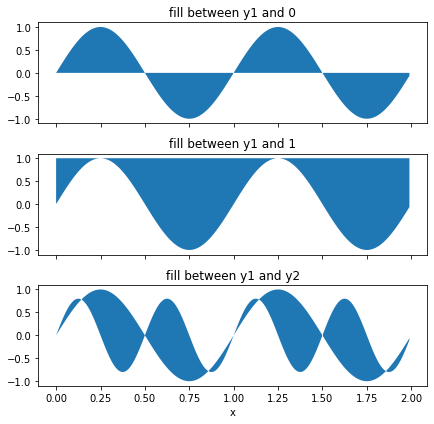

In [5]:
# The parameters y1 and y2 can be scalars, indicating a horizontal boundary at the given y-vales.
# If only y1 is given, y2 defaults to 0.

x = np.arange(0.0, 2, 0.01)
y1 = np.sin(2 * np.pi * x)
y2 = 0.8 * np.sin(4 * np.pi * x)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(6,6))

ax1.fill_between(x, y1)
ax1.set_title('fill between y1 and 0')

ax2.fill_between(x, y1, 1)
ax2.set_title('fill between y1 and 1')

ax3.fill_between(x, y1, y2)
ax3.set_title('fill between y1 and y2')
ax3.set_xlabel('x')
fig.tight_layout()

# Example : Confidence bands

In [6]:
# A common application for fill_between is the indication of confidence bands.

# fill_between uses the colors of the color cycle a sthe fill color. These may a bit strong
# when applied to fill areas. It is therefore often a good practice to lighten the color by making the area
# semi-transparent using alpha.

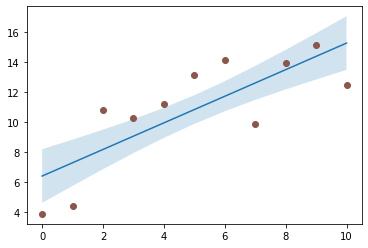

In [8]:
N = 21
x = np.linspace(0, 10, 11)
y = [3.9, 4.4, 10.8, 10.3, 11.2, 13.1, 14.1,  9.9, 13.9, 15.1, 12.5]

# fit a linear curve an estimate its y-values and their error
a, b = np.polyfit(x, y, deg=1)
y_est = a * x + b
y_err = x.std() * np.sqrt(1/len(x) + (x - x.mean()) ** 2 / np.sum((x - x.mean())** 2))

fig, ax = plt.subplots()
ax.plot(x, y_est, '-')
ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)
ax.plot(x, y, 'o', color='tab:brown')

# Selectively filling horizontal regions

In [9]:
'''
The parameter where allows to specify the x-ranges to fill. It's a boolean array with the same size as x.

Only x-ranges of contiguous True sequences are filled. As a result the range between neighboring
True and False values is never filled. This often undesired when the data points should represent a 
contiguous quantity. It is therefore recommended to set interpolate=True unless the x-distance of
the data points is fine enough so that the above effect is not noticeable. Interpolation approximates
the actual x position at which the wher condition will change and extends the filling up to there.
'''

"\nThe parameter where allows to specify the x-ranges to fill. It's a boolean array with the same size as x.\n\nOnly x-ranges of contiguous True sequences are filled. As a result the range between neighboring\nTrue and False values is never filled. This often undesired when the data points should represent a \ncontiguous quantity. It is therefore recommended to set interpolate=True unless the x-distance of\nthe data points is fine enough so that the above effect is not noticeable. Interpolation approximates\nthe actual x position at which the wher condition will change and extends the filling up to there.\n"

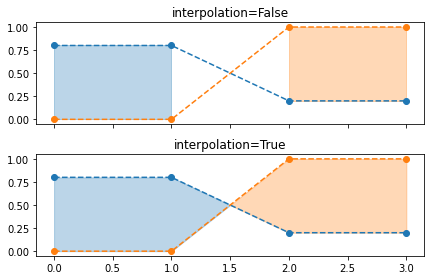

In [13]:
x = np.array([0, 1, 2, 3])
y1 = np.array([0.8, 0.8, 0.2, 0.2])
y2 = np.array([0, 0, 1, 1])

fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True)

ax1.set_title('interpolation=False')
ax1.plot(x, y1, 'o--')
ax1.plot(x, y2, 'o--')
ax1.fill_between(x, y1, y2, where = (y1 > y2), color='C0', alpha=0.3)
ax1.fill_between(x, y1, y2, where = (y1 < y2), color='C1', alpha=0.3)

ax2.set_title('interpolation=True')
ax2.plot(x,y1, 'o--')
ax2.plot(x, y2, 'o--')
ax2.fill_between(x, y1, y2, where=(y1 > y2), color='C0', alpha=0.3, interpolate=True)
ax2.fill_between(x, y1, y2, where=(y1 <= y2), color='C1', alpha=0.3, interpolate=True)

fig.tight_layout()


# Selectively marking horizontal regions across the whole Axes

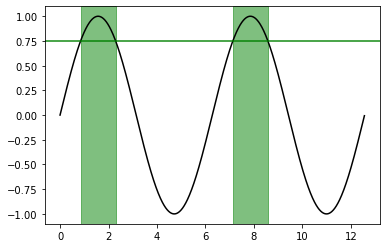

In [14]:
fig, ax = plt.subplots()
x = np.arange(0, 4 * np.pi, 0.01)
y = np.sin(x)

ax.plot(x, y, color='black')
threshold=0.75
ax.axhline(threshold, color='green', lw=2, alpha=0.7)
ax.fill_between(x, 0, 1, where=y > threshold, color='green', alpha=0.5, transform=ax.get_xaxis_transform())